<a href="https://colab.research.google.com/github/soobook/PyTorch-DL/blob/main/code/PT04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4회차: DNN을 활용한 심장병 판별 (2) – 데이터 처리 및 정규화

## 1. 코딩 환경 구축

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 최소-최대 정규화, 표준 정규화 함수 사용
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# UCI 데이터 저장소 패키지 설치
!pip install ucimlrepo

In [3]:
# UCI 데이터 저장소에서 심장병 데이터셋 가져오기
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features # 13개의 특징의 데이터프레임
y = heart_disease.data.targets  # 심장병 유무(target)

In [4]:
# 13개의 특징의 데이터프레임
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [5]:
# 심장병 유무(target)
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


## 2. 심장병 데이터 전처리

In [6]:
# X, y를 합쳐서 df으로 생성, target열을 심장병 유무(1, 0)으로 생성
df = X.copy()

# 열 target 생성: 0이면 정상, 나머지는 심장병 있음
df['target'] = np.where(y.num < 1, 0, 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
# 열별로 결측값 수 확인
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# 결측값이 있는 열 이름 출력
df.columns[df.isnull().any(axis=0)]

Index(['ca', 'thal'], dtype='object')

In [10]:
# 하나라도 결측값이 있는 행 확인
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [13]:
df.ca.value_counts(dropna=False), df.thal.value_counts(dropna=False)

(ca
 0.0    176
 1.0     65
 2.0     38
 3.0     20
 NaN      4
 Name: count, dtype: int64,
 thal
 3.0    166
 7.0    117
 6.0     18
 NaN      2
 Name: count, dtype: int64)

In [14]:
df.ca.value_counts(dropna=False)

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20
NaN,4


In [15]:
df.thal.value_counts(dropna=False)

,count
thal,
3.0,166
7.0,117
6.0,18
NaN,2


In [ ]:
df["ca"].mode()

,ca
0,0.0


In [16]:
df["thal"].mode()

,thal
0,3.0


In [17]:
df["ca"].mean()

np.float64(0.6722408026755853)

In [18]:
# 연속형 'ca' 열의 결측값을 평균값으로 채움
df["ca"] = df["ca"].fillna(df["ca"].mean())

# 범주형 'thal' 열의 결측값을 최빈값으로 채움
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])

In [19]:
# 하나라도 결측값이 있는 행이 없음을 확인
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [20]:
df.cp.value_counts(), df.restecg.value_counts(), df.slope.value_counts(), df.thal.value_counts()

(cp
 4    144
 3     86
 2     50
 1     23
 Name: count, dtype: int64,
 restecg
 0    151
 2    148
 1      4
 Name: count, dtype: int64,
 slope
 1    142
 2    140
 3     21
 Name: count, dtype: int64,
 thal
 3.0    168
 7.0    117
 6.0     18
 Name: count, dtype: int64)

In [21]:
pd.get_dummies(df, columns=['cp'])[['cp_1', 'cp_2', 'cp_3', 'cp_4']]

,cp_1,cp_2,cp_3,cp_4
0,True,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,True,False
4,False,True,False,False
...,...,...,...,...
298,True,False,False,False
299,False,False,False,True
300,False,False,False,True
301,False,True,False,False


In [22]:
pd.get_dummies(df, columns=['cp'], drop_first=True)[['cp_2', 'cp_3', 'cp_4']]

,cp_2,cp_3,cp_4
0,False,False,False
1,False,False,True
2,False,False,True
3,False,True,False
4,True,False,False
...,...,...,...
298,False,False,False
299,False,False,True
300,False,False,True
301,True,False,False


In [23]:
# 모든 범주형 변수 원-핫 인코딩
categorical_cols = ["cp", "restecg", "slope", "thal"]
df = pd.get_dummies(df, columns=categorical_cols)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    float64
 9   target     303 non-null    int64  
 10  cp_1       303 non-null    bool   
 11  cp_2       303 non-null    bool   
 12  cp_3       303 non-null    bool   
 13  cp_4       303 non-null    bool   
 14  restecg_0  303 non-null    bool   
 15  restecg_1  303 non-null    bool   
 16  restecg_2  303 non-null    bool   
 17  slope_1    303 non-null    bool   
 18  slope_2    303 non-null    bool   
 19  slope_3    303 non-null    bool   
 20  thal_3.0  

## 3. 데이터 정규화 및 시각화

In [25]:
# 최소-최대 정규화, 표준 정규화 함수 사용
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 정규화 대상: 연속형 수치 변수만 선택
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

In [26]:
# Min-Max 정규화
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])

In [27]:
df_minmax[numeric_cols]

,age,trestbps,chol,thalach,oldpeak,ca
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.000000
1,0.791667,0.622642,0.365297,0.282443,0.241935,1.000000
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.666667
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.000000
4,0.250000,0.339623,0.178082,0.770992,0.225806,0.000000
...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.000000
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.666667
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.333333
301,0.583333,0.339623,0.251142,0.786260,0.000000,0.333333


In [28]:
# Z-score 정규화
standard_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numeric_cols] = standard_scaler.fit_transform(df_zscore[numeric_cols])

In [29]:
df_zscore[numeric_cols]

,age,trestbps,chol,thalach,oldpeak,ca
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.723095
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.503851
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.428203
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.723095
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.723095
...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,-0.723095
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1.428203
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,0.352554
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,0.352554


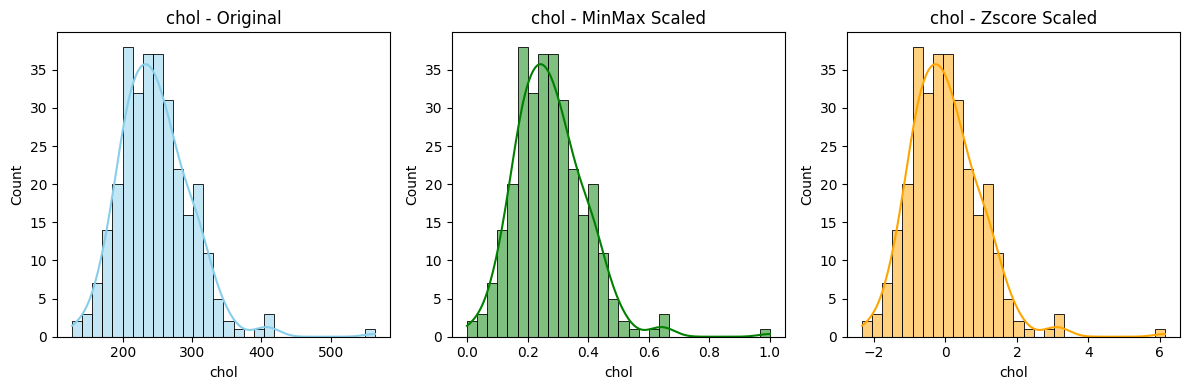

In [30]:
def plot_feature_distribution(df_original, df_scaled, feature, title_suffix):
    plt.figure(figsize=(12, 4))

    # 원본
    plt.subplot(1, 3, 1)
    sns.histplot(df_original[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"{feature} - Original")

    # Min-Max
    plt.subplot(1, 3, 2)
    sns.histplot(df_scaled[feature], kde=True, bins=30, color="green")
    plt.title(f"{feature} - MinMax {title_suffix}")

    # Z-score
    plt.subplot(1, 3, 3)
    sns.histplot(df_zscore[feature], kde=True, bins=30, color="orange")
    plt.title(f"{feature} - Zscore {title_suffix}")

    plt.tight_layout()
    plt.show()

# 예시: 'chol' 분포 시각화
plot_feature_distribution(df, df_minmax, "chol", "Scaled")

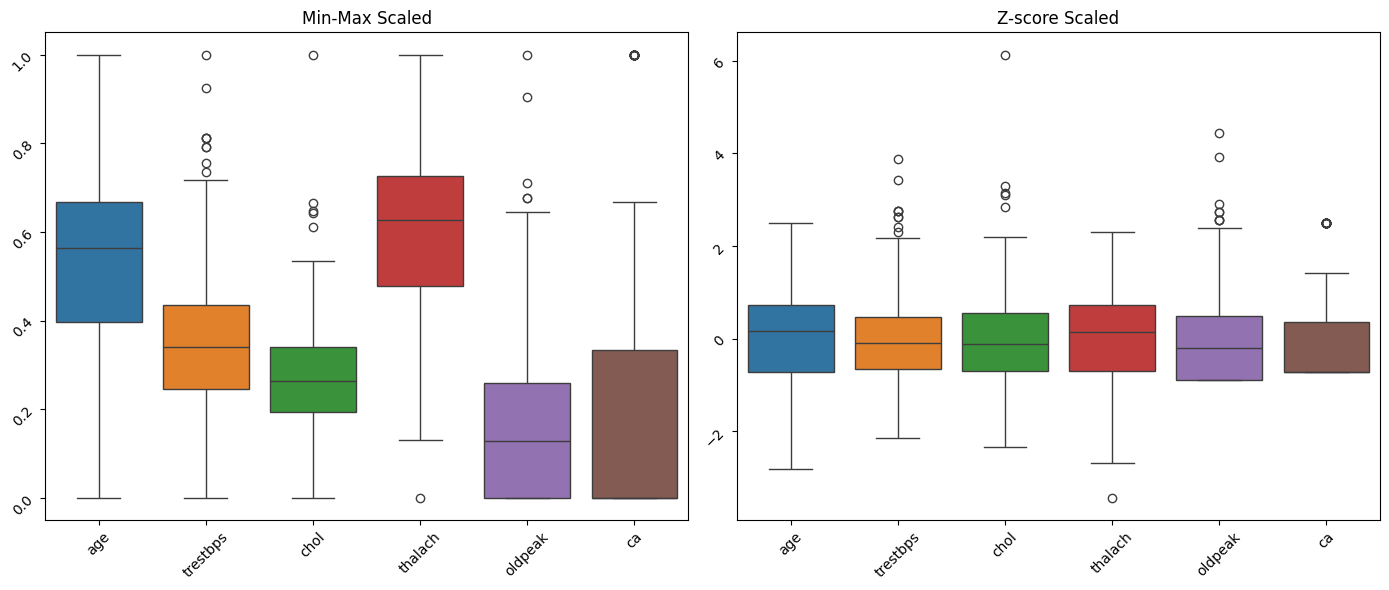

In [31]:
# 여러 특성 박스플롯 비교
def boxplot_compare(df1, df2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.boxplot(data=df1[numeric_cols], ax=axes[0])
    axes[0].set_title(title1)
    axes[0].tick_params(labelrotation=45)

    sns.boxplot(data=df2[numeric_cols], ax=axes[1])
    axes[1].set_title(title2)
    axes[1].tick_params(labelrotation=45)

    plt.tight_layout()
    plt.show()

boxplot_compare(df_minmax, df_zscore, "Min-Max Scaled", "Z-score Scaled")

In [32]:
# 원-핫 인코딩 전처리한 파일
df.to_csv("heart_disease_preprocessed.csv", index=False)
# 원-핫 인코딩, 최소-최대 정규화 전처리한 파일
df_minmax.to_csv("heart_disease_minmax.csv", index=False)
# 원-핫 인코딩, 표준 정규화 전처리한 파일, 이 파일을 다음 시간에 사용
df_zscore.to_csv("heart_disease_zscore.csv", index=False)

In [33]:
df1 = pd.read_csv("heart_disease_preprocessed.csv")
df1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,0,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3.0,1,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2.0,1,...,True,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,0,...,False,True,False,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,0,...,False,False,False,True,True,False,False,True,False,False


In [34]:
df2 = pd.read_csv("heart_disease_minmax.csv")
df2.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.355564,0.275555,0.148515,0.600055,0.326733,0.167678,0.224080,0.458746
std,0.188305,0.467299,0.166035,0.118212,0.356198,0.174618,0.469794,0.187270,0.310403,0.499120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.262557,0.000000,0.625954,0.000000,0.129032,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,0.725191,1.000000,0.258065,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df3 = pd.read_csv("heart_disease_zscore.csv")
df3.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,303.000000
mean,1.905333e-17,0.679868,4.543487e-16,2.418308e-16,0.148515,-1.172513e-16,0.326733,2.345026e-17,-4.103795e-17,0.458746
std,1.001654e+00,0.467299,1.001654e+00,1.001654e+00,0.356198,1.001654e+00,0.469794,1.001654e+00,1.001654e+00,0.499120
min,-2.819115e+00,0.000000,-2.145037e+00,-2.334877e+00,0.000000,-3.442067e+00,0.000000,-8.968617e-01,-7.230950e-01,0.000000
25%,-7.135564e-01,0.000000,-6.652997e-01,-6.905030e-01,0.000000,-7.053073e-01,0.000000,-8.968617e-01,-7.230950e-01,0.000000
50%,1.729945e-01,1.000000,-9.616980e-02,-1.101357e-01,0.000000,1.485618e-01,0.000000,-2.067053e-01,-7.230950e-01,0.000000
75%,7.270888e-01,1.000000,4.729601e-01,5.476139e-01,0.000000,7.178079e-01,1.000000,4.834512e-01,3.525538e-01,1.000000
max,2.500191e+00,1.000000,3.887739e+00,6.138485e+00,1.000000,2.294182e+00,1.000000,4.451851e+00,2.503851e+00,1.000000


## 종료